In [1]:
import numpy as np
import pandas as pd

# Set our RNG for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)

In [2]:
df = pd.read_csv("../../data/address_train_data.csv")
df.head()
df['label'].head()

0    False
1    False
2    False
3    False
4    False
Name: label, dtype: bool

## Remove numbers from text

In [6]:
df['clean_address'] = df['address'].replace('\d+', '', regex=True)

## Balance dataset by force

In [30]:
t = df[df.label == True]
f = df[df.label == False]
small_f = f.iloc[np.random.randint(0, len(f), len(t)+1000)]
df_balanced = pd.concat([small_f, t])
df_balanced['label'].value_counts()

False    3000
True     2000
Name: label, dtype: int64

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(analyzer= 'char_wb', ngram_range=(3,3), use_idf=False)

In [54]:
X_raw = tfv.fit_transform(df_balanced['clean_address']).toarray()
y_raw = df_balanced['label'].to_numpy()
# X_raw.shape

In [55]:
# Isolate our examples for our labeled dataset.
n_labeled_examples = X_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=30)

X_train = X_raw[training_indices]
y_train = y_raw[training_indices]

# Isolate the non-training examples we'll be querying.
X_pool = np.delete(X_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

In [50]:
from sklearn.linear_model import LogisticRegression
# Specify our core estimator.
logreg = LogisticRegression()

In [80]:
from functools import partial
from modAL.batch import uncertainty_batch_sampling
from modAL.models import ActiveLearner

# Pre-set our batch sampling to retrieve 3 samples at a time.
BATCH_SIZE = 30
preset_batch = partial(uncertainty_batch_sampling, n_instances=BATCH_SIZE)

# Specify our active learning model.
learner = ActiveLearner(
  estimator=logreg,

  X_training=X_train,
  y_training=y_train,

  query_strategy=preset_batch
)

/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
# Record our learner's score on the raw data.
unqueried_score = learner.score(X_raw, y_raw)

In [ ]:
# Pool-based sampling
#N_RAW_SAMPLES = 20
#N_QUERIES = N_RAW_SAMPLES // BATCH_SIZE
N_QUERIES = 20

performance_history = [unqueried_score]

for index in range(N_QUERIES):
    query_index, query_instance = learner.query(X_pool)

    # Teach our ActiveLearner model the record it has requested.
    X, y = X_pool[query_index], y_pool[query_index]
    learner.teach(X=X, y=y)

    # Remove the queried instance from the unlabeled pool.
    X_pool = np.delete(X_pool, query_index, axis=0)
    y_pool = np.delete(y_pool, query_index)

    # Calculate and report our model's accuracy.
    model_accuracy = learner.score(X_raw, y_raw)
    print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

    # Save our model's performance for plotting.
    performance_history.append(model_accuracy)

/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy after query 1: 0.5374


/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy after query 2: 0.9630


/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy after query 3: 0.9600


/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy after query 4: 0.9750


/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy after query 5: 0.9726


/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy after query 6: 0.9768


/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy after query 7: 0.9744


/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy after query 8: 0.9706


/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy after query 9: 0.9808


/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy after query 10: 0.9844


/home/dcossao/.conda/envs/a2xnotator/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy after query 11: 0.9842


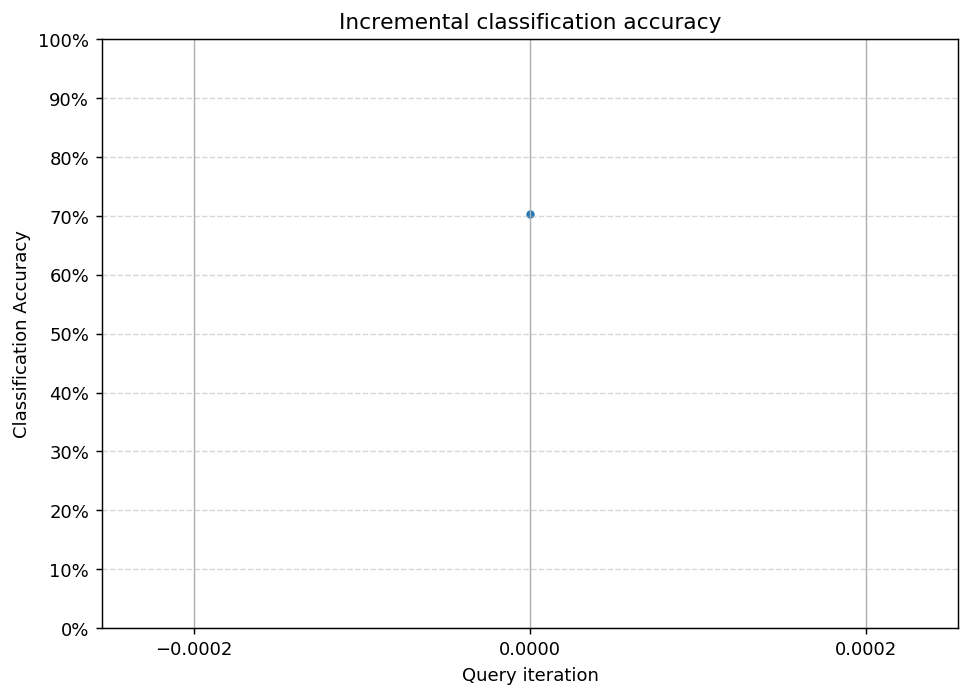

In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=N_QUERIES + 3, integer=True))
ax.xaxis.grid(True)

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
ax.set_ylim(bottom=0, top=1)
ax.yaxis.grid(True, linestyle='--', alpha=1/2)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()